<h1 style="font-size:3rem;color:red;"> Red Wine Qualities</h1>

<img src="https://miro.medium.com/max/600/1*2ayKmvVZCYaLPl-nmLLp5g.png">

What was your "coming of age" alcoholic drink? Mine was red wine. There's something so elegant about the deep rouge colour and complexity of the flavours - or maybe i just liked the illusion of sophistication it created when held in hand? Either way, red wine is a favourite of mine as well as many European nations.  

For those that don't know me i am pharmaceutical and chemical science graduate, and my dissertation was based off the so called "French paradox" where very low incidence of coronary heart disease mortality was recorded in France despite the fact that saturated fat intakes, serum cholesterol, blood pressure and prevalence of smoking are high. One theory concluded that a high consumption of red wine is the cause of this phenomenon - more specifically the anti-aging stillbenoid resveratrol that is within wine. 

So now that I've briefly outlined why a-red-wine-a-day (a small amount) keeps the doctor away, lets look into what makes red wines desirable for all you wannabe wine connoisseurs. 

<img src="winecompositiion.png" style="width:800px;height:600px"/>

# Where is the dataset from?

Using the Wine Quality Data Set from UCI. The data set contains the physicochemical properties and the sensory test results of 1599 wine samples. The wine in this study is the red variant of the North Portuguese Vinho Verde wine. 

In [28]:
import pandas as pd

In [29]:
import numpy as np

In [30]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import seaborn as sns

In [55]:
wine_data = pd.read_csv("winequality-red.csv")

In [56]:
#Lets have a quick overview of all teh data frame
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Data Cleaning

In [33]:
# Data types of collumns
wine_data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

The majority data type is floats with one column being integers. This is quite nice as we wont have to convert any strings to numbers to analyse the data

In [34]:
 # lets us see if there is any null data
for col in wine_data.columns:
        dat_missing = np.mean(wine_data[col].isnull())
        print('{} - {}%'.format(col, dat_missing))

fixed acidity - 0.0%
volatile acidity - 0.0%
citric acid - 0.0%
residual sugar - 0.0%
chlorides - 0.0%
free sulfur dioxide - 0.0%
total sulfur dioxide - 0.0%
density - 0.0%
pH - 0.0%
sulphates - 0.0%
alcohol - 0.0%
quality - 0.0%


In [35]:
# lets also drop any duplicates
wine_data.drop_duplicates()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Data Exploration

This data set can be used straight away without any further cleaning. No data is missing so we can jump straight into data exploration. 

In [36]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [37]:
wine_data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [38]:
wine_data.tail(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
1590,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [39]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


I will begin by seperating the data into 2 groups - high quality and low quality. High quality being red wines with a quality score of 7 and above and low quality 4 and below. Quality 5 and 6 are mid-tier/okay wines, so i will possibly look at these later.

The maximum value of quality recorded is 8 and the minimum is 3. 

In [40]:
high_q = wine_data.loc[wine_data['quality'] >= 7, ['quality']]

In [41]:
low_q = wine_data.loc[wine_data['quality'] <= 4, ['quality']]

So there are 217 high quality redwines and 63 low quality wines in this dataset which i will be working with. 

In [42]:
low_q

,quality
18,4
38,4
41,4
45,4
73,4
...,...
1480,4
1482,4
1484,4
1505,3


Lets start comparing each attribute of the low quality wines and high quality wines one by one.

In [43]:
low_qa = wine_data.loc[wine_data['quality'] <= 4, ['quality', 'fixed acidity']]

In [44]:
high_qa = wine_data.loc[wine_data['quality'] >= 7, ['quality', 'fixed acidity']]

In [45]:
low_qa.sort_values(by = 'fixed acidity' )

,quality,fixed acidity
45,4,4.6
94,4,5.0
1480,4,5.6
38,4,5.7
1235,4,6.0
...,...,...
573,4,10.5
833,4,11.6
459,3,11.6
937,4,12.0


In [46]:
low_qa.describe()

,quality,fixed acidity
count,63.000000,63.000000
mean,3.841270,7.871429
std,0.368359,1.649284
min,3.000000,4.600000
25%,4.000000,6.800000
50%,4.000000,7.500000
75%,4.000000,8.400000
max,4.000000,12.500000


Below i calculated the Coefficient of variation of fixed acidity which is 21% (to 1 decimal place)

In [47]:
(1.649284/7.871429) * 100

20.95279014776097

In [48]:
high_qa.sort_values(by = 'fixed acidity' )

,quality,fixed acidity
821,7,4.9
588,8,5.0
1157,7,5.1
802,7,5.1
1228,7,5.1
...,...,...
538,7,12.9
509,7,13.3
243,7,15.0
244,7,15.0


In [49]:
high_qa.describe()

,quality,fixed acidity
count,217.000000,217.000000
mean,7.082949,8.847005
std,0.276443,1.999977
min,7.000000,4.900000
25%,7.000000,7.400000
50%,7.000000,8.700000
75%,7.000000,10.100000
max,8.000000,15.600000


In [50]:
(1.999977/8.847005) * 100

22.60626053675792

Both low quality and high quality red wines have similar means as well as Coefficient of Variation

As there are soo many columns to compare - To get a quick overview of correlation between quality vs the other wine components i will call a correlation matrix.

In [51]:
wine_data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


The highest correlation is between quality vs volatile acidity (negative) and quality vs alcohol (positive)

Text(0, 0.5, 'Volatile Acidity')

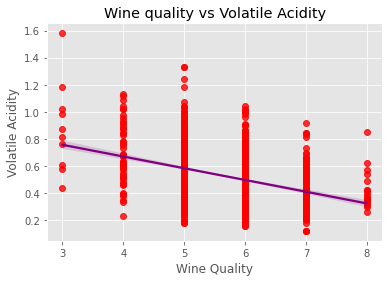

In [52]:
sns.regplot(x='quality', y='volatile acidity', data=wine_data, scatter_kws={"color":"red"}, line_kws={"color":"purple"})
plt.title('Wine quality vs Volatile Acidity')
plt.xlabel('Wine Quality')
plt.ylabel('Volatile Acidity')

Text(0, 0.5, 'Alcohol')

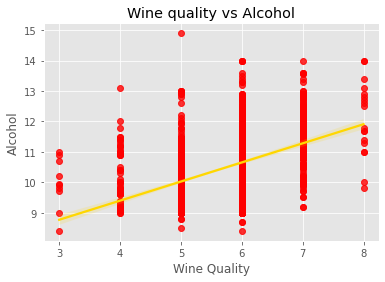

In [53]:
sns.regplot(x='quality', y='alcohol', data=wine_data, scatter_kws={"color":"red"}, line_kws={"color":"gold"})
plt.title('Wine quality vs Alcohol')
plt.xlabel('Wine Quality')
plt.ylabel('Alcohol')

Text(32.99999999999999, 0.5, 'Component')

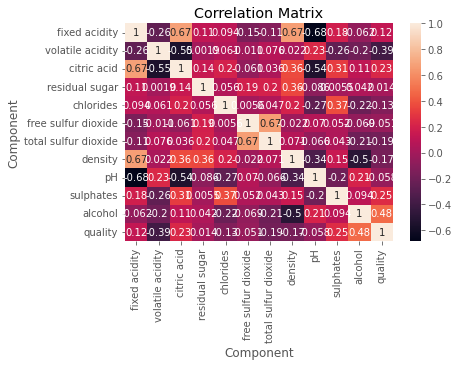

In [54]:
# Visualisation for the correlation matrix - Though because there are so many columns - it isnt the clearest looking visualisation
corr_matrix = wine_data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.xlabel('Component')
plt.ylabel('Component')

# From the correlations that we have explored we can summise two conclusions:

(1) The higher the quality of red wine the lower the Volatile Acidity


(2) Higher quality red wines have higher Alcohol content